<a href="https://colab.research.google.com/github/VaneezaAhmad/Text-Prediction/blob/main/predictive_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import nltk
from nltk import word_tokenize, RegexpTokenizer
from nltk.probability import FreqDist

In [3]:
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Read in Data

In [5]:
from google.colab import files
uploaded = files.upload()

Saving wonderland.txt to wonderland.txt


In [6]:
alice =  open("wonderland.txt", "r", encoding="utf_8").read()
alice= alice.lower() 

In [8]:
alice

'project gutenberg’s alice’s adventures in wonderland, by lewis carroll\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.org\n\n\ntitle: alice’s adventures in wonderland\n\nauthor: lewis carroll\n\nposting date: june 25, 2008 [ebook #11]\nrelease date: march, 1994\nlast updated: october 6, 2016\n\nlanguage: english\n\ncharacter set encoding: utf-8\n\n*** start of this project gutenberg ebook alice’s adventures in wonderland ***\n\n\n\n\n\n\n\n\n\n\nalice’s adventures in wonderland\n\nlewis carroll\n\nthe millennium fulcrum edition 3.0\n\n\n\n\nchapter i. down the rabbit-hole\n\nalice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations

# Preprocessing the Data

In [9]:
# create mapping of unique chars to integers
chars = sorted(list(set(alice)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [10]:
print(chars)

['\n', ' ', '!', '#', '$', '%', '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '@', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '‘', '’', '“', '”']


In [11]:
n_chars = len(alice)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  163816
Total Vocab:  60


In [12]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
tokenized = word_tokenize(alice)

In [14]:
tokenized = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
alice_token = tokenized.tokenize(alice)

In [15]:
len(alice_token)

29763

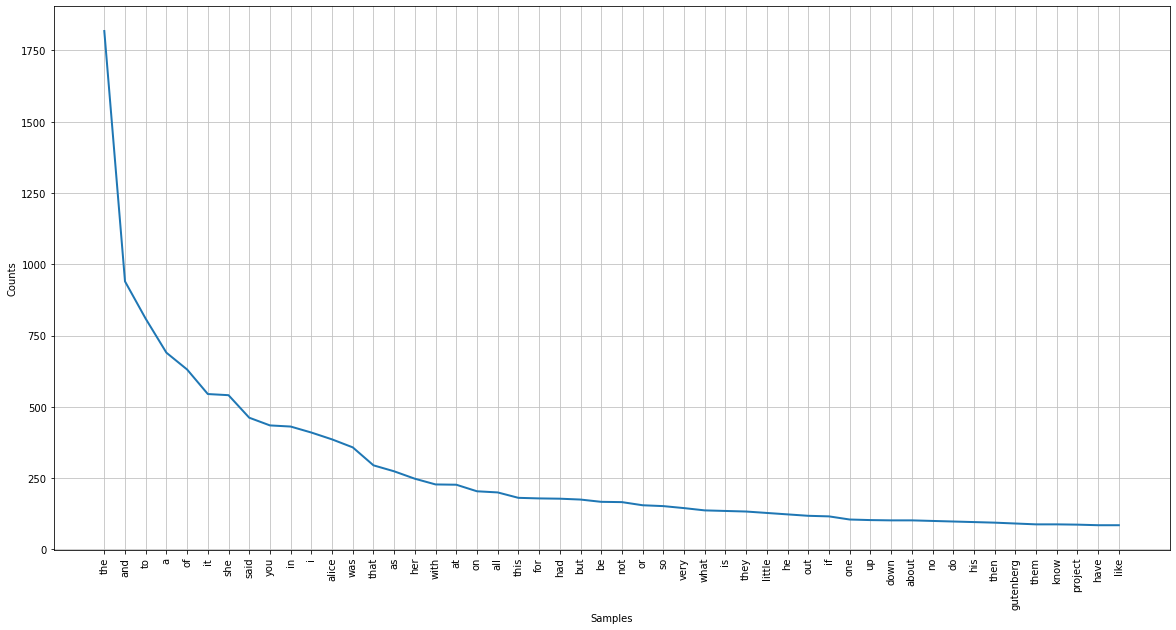

In [16]:
# Frequency distribution of words 
fdist = FreqDist(alice_token)
plt.figure(figsize=(20, 10))
fdist.plot(50);

In [17]:
unique = list(set(alice_token))

In [18]:
len(unique)

3075

In [26]:
WORD_LENGTH = 3
prev_words = []
next_words = []
for i in range(len(alice_token) - WORD_LENGTH):
    prev_words.append(alice_token[i:i + WORD_LENGTH])
    next_words.append(alice_token[i + WORD_LENGTH])
print(prev_words[:5])
print(next_words[:5])

[['project', 'gutenberg’s', 'alice’s'], ['gutenberg’s', 'alice’s', 'adventures'], ['alice’s', 'adventures', 'in'], ['adventures', 'in', 'wonderland'], ['in', 'wonderland', 'by']]
['adventures', 'in', 'wonderland', 'by', 'lewis']


In [21]:
unique_words = np.unique(alice_token)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [22]:
len(unique_words)

3075

In [23]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    y[i, unique_word_index[next_words[i]]] = 1

In [23]:
# X= []
# y= []
# for word in prev_words:
#     X.append(word)
    
# for word in next_words:
#     y.append(word)
    
# print("X: ", X[:13])
# print("y: ", y[:13])

In [24]:
len(X), len(y)

(29760, 29760)

In [28]:
pd.DataFrame(X)

ValueError: ignored

# First Model

In [29]:
model = Sequential()
model.add(LSTM(64, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation("softmax"))

In [30]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
history=model.fit(X,y, epochs=10, batch_size=128, validation_split=0.05).history

Epoch 1/10
221/221 [==============================] - 35s 65ms/step - loss: 6.3589 - accuracy: 0.0635 - val_loss: 6.8753 - val_accuracy: 0.1129
Epoch 2/10
221/221 [==============================] - 14s 62ms/step - loss: 5.3351 - accuracy: 0.1324 - val_loss: 7.0789 - val_accuracy: 0.1169
Epoch 3/10
221/221 [==============================] - 14s 63ms/step - loss: 4.9579 - accuracy: 0.1705 - val_loss: 7.0065 - val_accuracy: 0.1169
Epoch 4/10
221/221 [==============================] - 13s 61ms/step - loss: 4.6219 - accuracy: 0.2104 - val_loss: 7.5089 - val_accuracy: 0.1250
Epoch 5/10
221/221 [==============================] - 13s 60ms/step - loss: 4.3555 - accuracy: 0.2500 - val_loss: 7.9840 - val_accuracy: 0.1263
Epoch 6/10
221/221 [==============================] - 14s 61ms/step - loss: 4.2239 - accuracy: 0.2851 - val_loss: 8.2393 - val_accuracy: 0.1331
Epoch 7/10
221/221 [==============================] - 13s 60ms/step - loss: 4.0163 - accuracy: 0.3263 - val_loss: 8.4766 - val_accuracy:

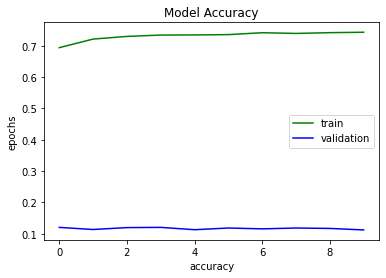

In [41]:
plt.plot(history["accuracy"], color="green")
plt.plot(history["val_accuracy"], color="blue")
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train", "validation"]);

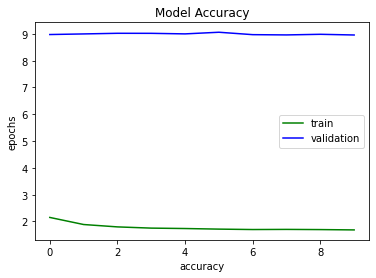

In [42]:
plt.plot(history["loss"], color="green")
plt.plot(history["val_loss"], color="blue")
plt.title("Model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train", "validation"]);